# Выявление определяющих успешность игры закономерностей
<br> Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<br> **Цель проекта:** проанализировать исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и определить потенциально популярный продукт и спланировать рекламные кампании.

<br> Для достижения поставленной цели необходимо выполнить следующие задачи:

<br> **Задачи проекта:**
1. Изучение и подготовка данных
2. Проведение исследовательского анализа данных
3. Составление портрета пользователя каждого региона
4. Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC
5. Проверка гипотезы о неравенстве средних пользовательских рейтингов жанров Action и Sports

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import calendar
import seaborn as sb

In [2]:
pd.options.mode.chained_assignment = None 
default='warn'
sb.set_style('whitegrid') # настройка стиля для seaborn
colors = sb.color_palette('bright')[0:5]  # настройка палитры для seaborn

### Чтение файла и просмотр общей информации

In [3]:
#Читаем файл
data_games = pd.read_csv('/datasets/games.csv')
#Выведем число строк
print('Число строк:', len(data_games))
#Просмотр первые строки файла
display(data_games.head(10))
#Просмотр общей информации о файле
data_games.info()

Число строк: 16715


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#посмотрим на количество пропусков в каждом столбце таблицы
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Проверка на явные дубликаты

In [5]:
#Проверим таблицу на явные дубликаты
data_games.duplicated().sum()

0

In [6]:
#Поиск дубликатов по паре Имя-консоль
data_games_dubl = data_games.loc[data_games.duplicated(subset=[
    'Name', 'Platform'], keep=False)]
print(data_games_dubl)

                              Name Platform  Year_of_Release     Genre  \
604                  Madden NFL 13      PS3           2012.0    Sports   
659                            NaN      GEN           1993.0       NaN   
1190   Need for Speed: Most Wanted     X360           2012.0    Racing   
1591   Need for Speed: Most Wanted     X360           2005.0    Racing   
1745            Sonic the Hedgehog      PS3           2006.0  Platform   
4127            Sonic the Hedgehog      PS3              NaN  Platform   
5972   Need for Speed: Most Wanted       PC           2005.0    Racing   
11715  Need for Speed: Most Wanted       PC           2012.0    Racing   
14244                          NaN      GEN           1993.0       NaN   
16230                Madden NFL 13      PS3           2012.0    Sports   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
604        2.11      0.22      0.00         0.23          83.0        5.5   
659        1.78      0.53      

При проверке было найдено 5 дубликатов, у которых совпадают пары Имя-Консоль. Но при этом вся остальная информация различается. Поэтому оставляем данные записи в датафрейме

### Проверка уникальных значений

In [7]:
for row in data_games:
    print(row)
    print(data_games[row].value_counts(dropna=False).sort_index(ascending=True))
    print()

Name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
NaN                             2
Name: Name, Length: 11560, dtype: int64

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
19

In [8]:
#Просмотр строк со значением tbd в столбце User_Score
print(data_games[data_games['User_Score'] == 'tbd'])

                                           Name Platform  Year_of_Release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score 

### Просмотр статистических значений

In [9]:
data_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Выводы по главе 1

Изучая таблицу можно заметить, что она содержит 16715 записей в 11 колонках:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков
* `User_Score` — оценка пользователей
* `Rating` — рейтинг от организации ESRB
<br> Названия столбцов не соответствуют требованиям змеиного регистра, в главе 2 переименуем их
<br> В столбце `Name` есть два пропуска, удаляем, они важны для исследования, и их немного (2 шт)
<br> Пропуски в столбце `Year_of_Release` удаляем, они важны для исследования, и их немного (1,6%)
<br> Пропуски в столбце `Genre` удаляем, они важны для исследования, и их немного (2 шт)
<br> Пропуски в столбце `Critic_Score` оставляем, данные важны для исследования и пропусков слишком много
<br> Пропуски в столбце `User_Score` оставляем, данные важны для исследования и пропусков слишком много
<br> Пропуски в столбце `Rating` оставляем, данные важны для исследования и пропусков слишком много
<br> В столбце `User_Score` 2424 игры имеют оценку `tbd`, что означает, что оценка пользователя еще не проставлена. Следовательно, заменим данные оценки на NaN
<br> Тип данных в столбце `Year_of_Release` - float64, что не соответствует здравому смыслу, в главе 2 заменим его на int64
<br> Тип данных в столбце `User_Score` - object, что не соответствует здравому смыслу, в главе 2 заменим его на float64
<br> Тип данных в столбце `Critic_Score` - float64, что не соответствует здравому смыслу (оценка является только целым числом), в главе 2 заменим его на int64
<br> Данных для проверки достаточно, необходимо провести вышеуказанные операции, а затем провести исследовательский анализ данных

## Предобработка данных

### Корректировка названий столбцов

In [10]:
data_games.columns = data_games.columns.str.lower()
data_games.head().T

,0,1,2,3,4
name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
platform,Wii,NES,Wii,Wii,GB
year_of_release,2006,1985,2008,2009,1996
genre,Sports,Platform,Racing,Sports,Role-Playing
na_sales,41.36,29.08,15.68,15.61,11.27
eu_sales,28.96,3.58,12.76,10.93,8.89
jp_sales,3.77,6.81,3.79,3.28,10.22
other_sales,8.45,0.77,3.29,2.95,1
critic_score,76,NaN,82,80,NaN
user_score,8,NaN,8.3,8,NaN


### Обработка пропусков

In [11]:
#Столбец year_of_release, имеющий малое количество пропусков (менее 2% от общего числа строк)
data_games = data_games.query('year_of_release >= 1980')
data_games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [12]:
#Столбцы name и genre, имеющие малое количество пропусков
data_games.dropna(subset=['name', 'genre'], inplace=True)
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Столбцы critic_score, user_score, rating, имеющие большое количество пропусков и важные для исследования
<br> Оставим данные пропуски без заполнения, но будем учитывать их наличие на следующих этапах исследования.
<br> В столбце user_score строки со значением tbd, обработаем заменой tbd на NaN

In [13]:
data_games = data_games.replace('tbd', 'NaN')
#Проверим, что строк со значением tbd больше нет
print(len(data_games[data_games['user_score'] == 'tbd']))

0


### Преобразование форматов столбцов

In [14]:
#Пробразуем вышеперечисленные столбцы в необходимые форматы
data_games['year_of_release'] = data_games['year_of_release'].astype('int64')
data_games['user_score'] = data_games['user_score'].astype('float64')
data_games = data_games.astype({'critic_score': 'Int64'})
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Выводы по главе 2

Предобработка данных завершена успешно. Задачи поставленные в главе 1 выполнены

## Расчет новых данных

Создадим новый столбец `total_sales` и занесем в него суммарные продажи во всех регионах

In [16]:
data_games['total_sales'] = (
    data_games['na_sales'] + 
    data_games['eu_sales'] + 
    data_games['jp_sales'] + 
    data_games['other_sales']
)
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Выводы по главе 3

В датафрейм добавлен новый столбец с величиной суммарных продаж во всех регионах

## Исследовательский анализ данных

### Расчет количества игр, выпущенных в разные годы

In [17]:
data_games_year = data_games.pivot_table(      
    index='year_of_release',
    values='name',
    aggfunc=['count']               
)
#переименуем столбец 
data_games_year.columns = ['total_count_games']
#сделаем переиндексацию
data_games_year.reset_index(inplace=True)
data_games_year.head(10)

,year_of_release,total_count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


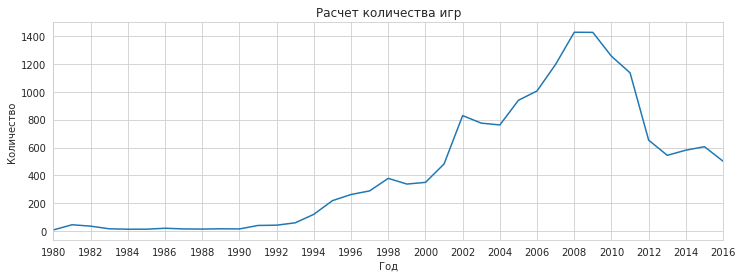

In [18]:
data_games_year.plot(
    x='year_of_release', y='total_count_games', kind = 'line', 
    grid=True, title='Расчет количества игр',
    figsize=(12, 4),
    legend = False,
    xticks=[1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016]
);
plt.xlim([1980, 2016])
plt.xlabel('Год')
plt.ylabel('Количество');

Исходя из построенного графика, можно увидеть, что наибольшее количество игр выпускалось в период 2008-2009 гг. <br> До 2008 года выпуск игр стабильно увеличивался, после 2009 года наблюдается резкий спад выпуска игр
<br> Данные по компьютерным играм очень быстро устаревают и теряют актуальность, поэтому не имеет смысла исследовать данные за все периоды

### Выборка платформ с наибольшими суммарными продажами

In [19]:
data_games_platform = data_games.pivot_table(      
    index='platform',
    values='total_sales',
    aggfunc=['sum']               
)
#переименуем столбец 
data_games_platform.columns = ['total_sum_sales']
#сделаем переиндексацию
data_games_platform.reset_index(inplace=True)
data_games_platform = data_games_platform.sort_values('total_sum_sales', ascending=False)
data_games_platform.head(10)

,platform,total_sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


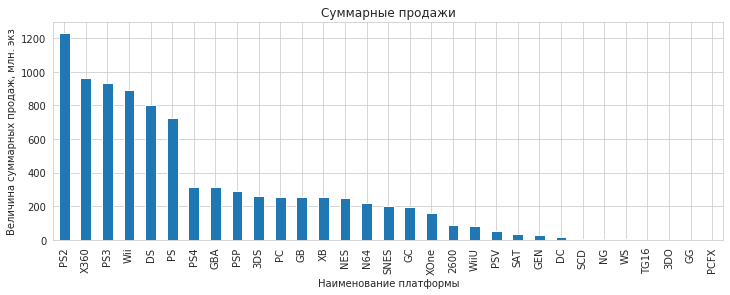

In [20]:
data_games_platform.plot(
    x='platform', y='total_sum_sales', kind = 'bar', 
    grid=True, label = 'Суммарные продажи', title='Суммарные продажи',
    figsize=(12, 4),
    legend = False
)
plt.xlabel('Наименование платформы');
plt.ylabel('Величина суммарных продаж, млн. экз');

In [21]:
top_platforms = data_games_platform[0:5]
top_platforms = top_platforms['platform'].unique()
#Выведем топ-5 популярных платформ
print('Платформы с наибольшими суммарными продажами (топ-5):', top_platforms)

Платформы с наибольшими суммарными продажами (топ-5): ['PS2' 'X360' 'PS3' 'Wii' 'DS']


Построим распределение по данным платформам по годам

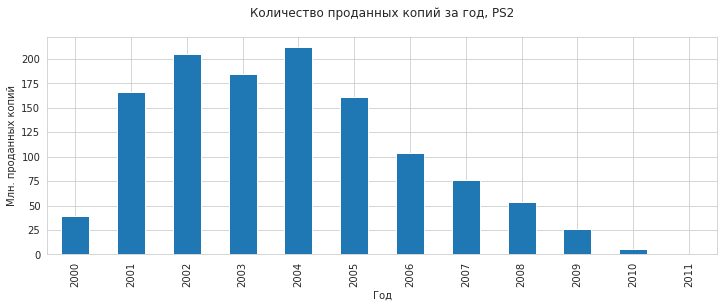

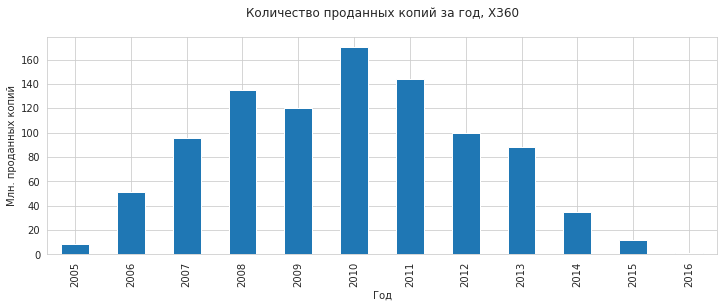

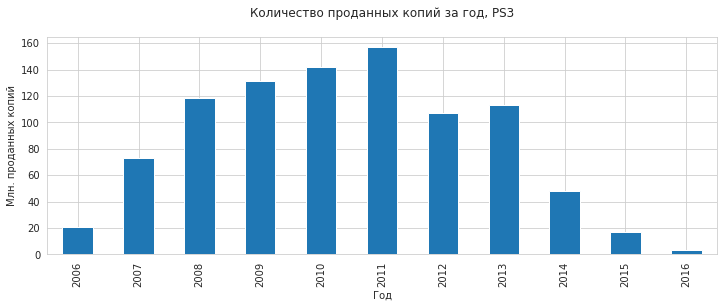

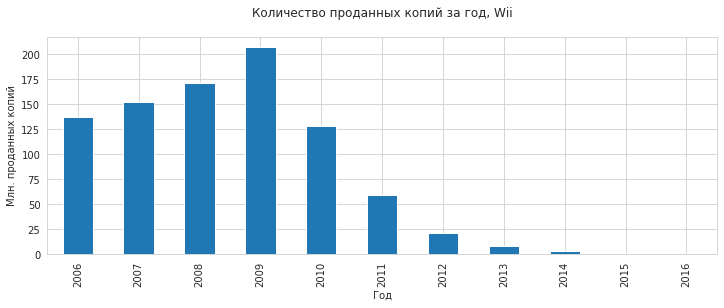

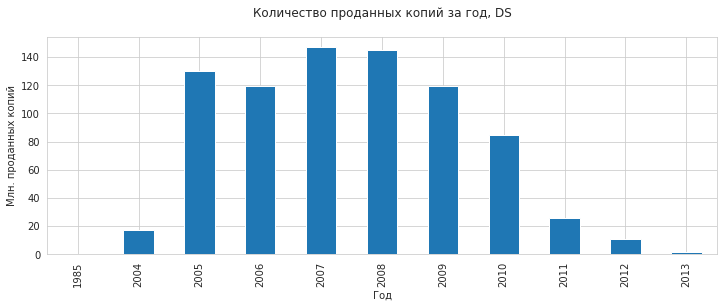

In [22]:
for platform in top_platforms:
    data_games[data_games['platform'] == platform].pivot_table(
        index='year_of_release', 
        values='total_sales', 
        aggfunc='sum'
    ).plot(kind='bar', figsize=(12,4), legend = False)
    plt.title(label='Количество проданных копий за год, '+platform, pad=20)
    plt.xlabel('Год')
    plt.ylabel('Млн. проданных копий')

Исходя из построенных диаграмм, характерный срок за которые появляются новые и исчезают старые платформы - 10 лет.

### Отбор данных за актуальный период

Исходя из пункта 4.2 примем за актуальный период  5 предыдущих лет, поскольку за 10 лет жизни платформа развивается и умирает, нас интересуют только платформы на подьеме. Следовательно, так как мы прогнозируем рынок на 2017 год, то в актуальный период войдут года позднее 2012. 
<br> Не смотря на то, что данные за 2016 год не полные, примем за актуальный период 2013 - 2016 гг.

In [23]:
data_games_actual = data_games.query('year_of_release > 2012')
data_games_actual.reset_index()
data_games_actual = data_games_actual.sort_values('total_sales', ascending=False)
data_games_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


Выберем несколько потенциально прибыльных платфор

In [24]:
data_platform_actual = data_games_actual.pivot_table(      
    index='platform',
    values='total_sales',
    aggfunc=['sum']               
)
#переименуем столбец 
data_platform_actual.columns = ['total_sum_sales']
#сделаем переиндексацию
data_platform_actual.reset_index(inplace=True)
data_platform_actual = data_platform_actual.sort_values('total_sum_sales', ascending=False)
data_platform_actual.head(10)

,platform,total_sum_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


In [25]:
top_actual_platform = data_platform_actual[0:5]
top_actual_platform = top_actual_platform['platform'].unique()
#Выведем топ-5 популярных платформ, актуальных на сегодняшний день
print('Актуальные платформы с наибольшими суммарными продажами (топ-5):', top_actual_platform)

Актуальные платформы с наибольшими суммарными продажами (топ-5): ['PS4' 'PS3' 'XOne' '3DS' 'X360']


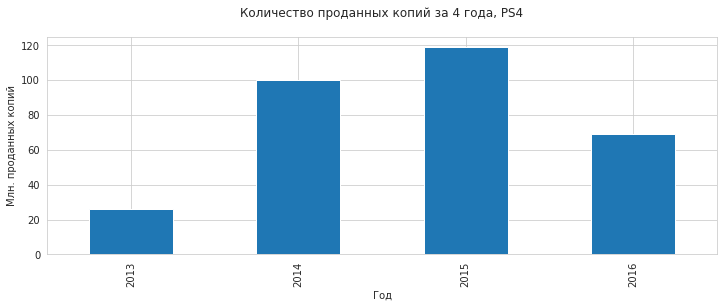

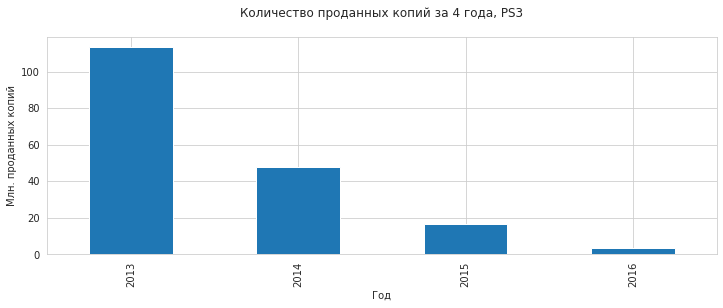

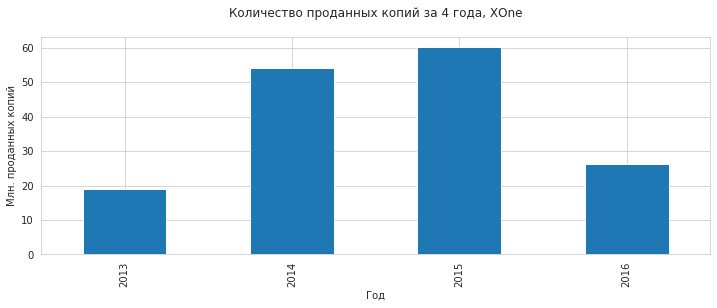

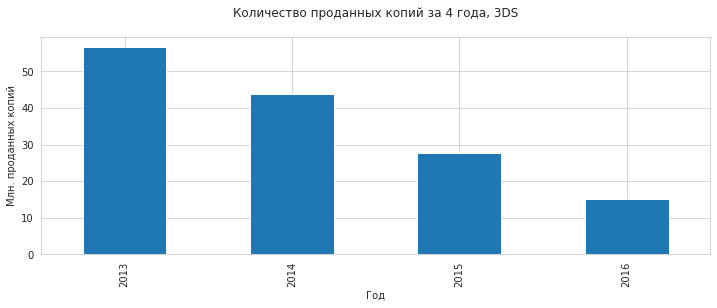

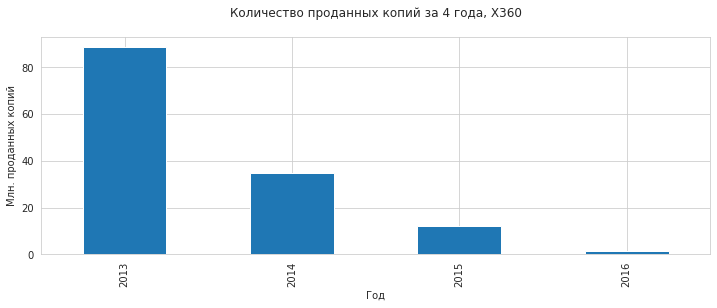

In [26]:
for platform in top_actual_platform:
    data_games_actual[data_games_actual['platform'] == platform].pivot_table(
        index='year_of_release', 
        values='total_sales', 
        aggfunc='sum'
    ).plot(kind='bar', figsize=(12,4), legend = False)
    plt.title(label='Количество проданных копий за 4 года, '+platform, pad=20)
    plt.xlabel('Год')
    plt.ylabel('Млн. проданных копий')

Следовательно, лидируют по продажам платформы PS4, PS3, X360, 3DS, XOne.
<br> При этом платформы PS3, X360, 3DS сдают позиции, а платформы XOne и PS4, при условии, что данные за 2016 год не полные, держатся на плаву
<br> Примем платформы XOne и PS4 - как потенциально прибыльные на 2017 год

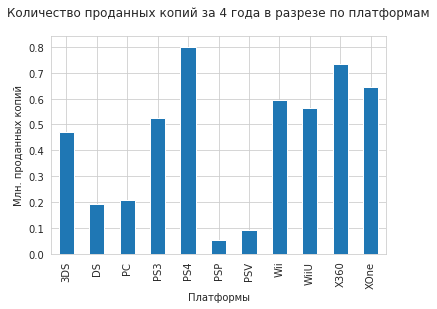

In [27]:
(data_games_actual
    .groupby('platform')['total_sales'].mean()
    .plot(x='platform',y='total_sales',kind='bar',grid=True) 
)
plt.title(label='Количество проданных копий за 4 года в разрезе по платформам', pad=20)
plt.xlabel('Платформы')
plt.ylabel('Млн. проданных копий');

Примем как потенциально прибыльные платформы - XOne и PS4

In [28]:
# КОД РЕВЬЮЕРА

data_games_actual.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


### Построение «ящика с усами» по глобальным продажам игр в разбивке по платформам

In [29]:
data_two_games_actual = data_games_actual.query(
    ('platform == "XOne" | platform == "PS4" | platform == "3DS"')
)
data_two_games_actual.reset_index()
data_two_games_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39


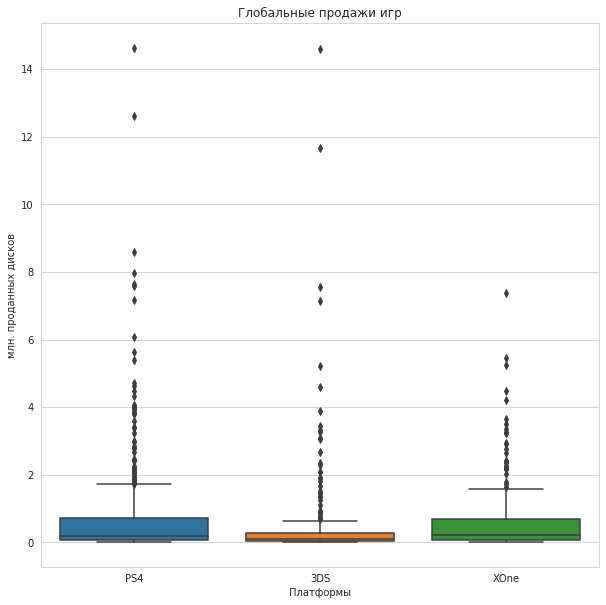

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data_two_games_actual, x='platform', y='total_sales'
).set_title("Глобальные продажи игр")
plt.suptitle('');
plt.xlabel('Платформы')
plt.ylabel('млн. проданных дисков')
plt.show()

In [31]:
data_two_games_actual.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,942.0,2014.818471,1.023610,2013.00,2014.00,2015.000,2016.0000,2016.00
na_sales,942.0,0.254841,0.578818,0.00,0.00,0.040,0.2200,6.03
eu_sales,942.0,0.237410,0.605987,0.00,0.00,0.040,0.1875,6.31
jp_sales,942.0,0.089289,0.337464,0.00,0.00,0.010,0.0600,4.35
other_sales,942.0,0.073142,0.182421,0.00,0.00,0.010,0.0500,2.38
critic_score,492.0,71.973577,12.809958,19.00,65.00,74.000,81.0000,97.00
user_score,519.0,6.703854,1.450637,1.50,6.00,6.900,7.8000,9.20
total_sales,942.0,0.654682,1.410325,0.01,0.05,0.155,0.5775,14.63


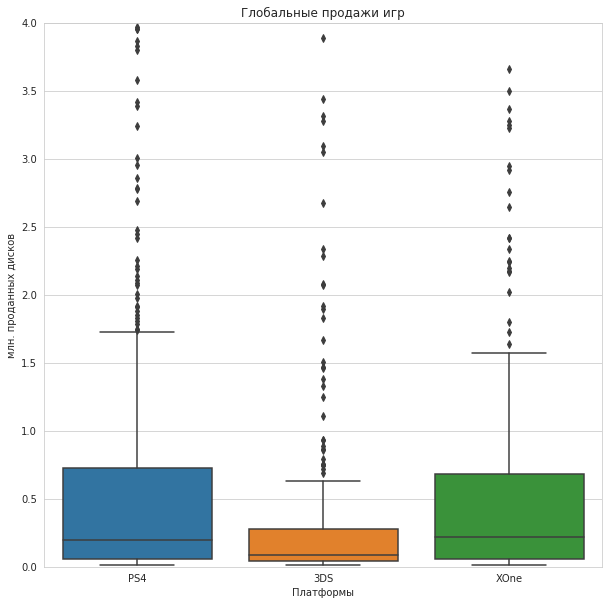

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data_two_games_actual, x='platform', y='total_sales'
).set_title("Глобальные продажи игр")
plt.ylim(0, 4)
plt.suptitle('');
plt.xlabel('Платформы')
plt.ylabel('млн. проданных дисков')
plt.show()

Обе платформы имеют одинаковое распределение. В обоих случаях среднее значение глобальных продаж больше, чем медиана, следовательно, распределения скошены вправо

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

Выберем платформу PS4

Построим диаграмму рассеяния для показателей количество проданных дисков и оценок критиков

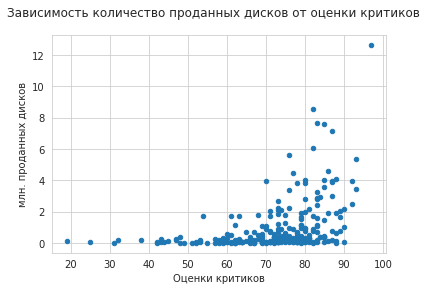

In [33]:
data_games_actual.query(
    'platform=="PS4"'
).sort_values(
    by='critic_score',ascending=True
).plot(kind='scatter',x='critic_score',y='total_sales');
plt.suptitle('Зависимость количество проданных дисков от оценки критиков');
plt.xlabel('Оценки критиков')
plt.ylabel('млн. проданных дисков')
plt.show()

Построим диаграмму рассеяния для показателей количество проданных дисков и оценок пользователей

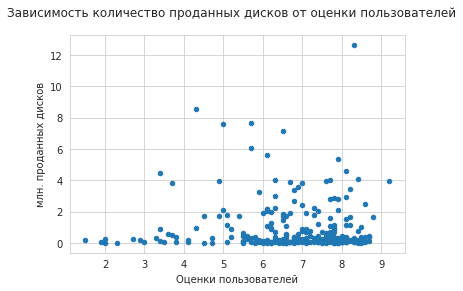

In [34]:
data_games_actual.query(
    'platform=="PS4"'
).sort_values(
    by='user_score',ascending=True
).plot(kind='scatter',x='user_score',y='total_sales');
plt.suptitle('Зависимость количество проданных дисков от оценки пользователей');
plt.xlabel('Оценки пользователей')
plt.ylabel('млн. проданных дисков')
plt.show()

In [35]:
data_games_actual.query(
    'platform=="PS4"'
)[[
    'total_sales', 'critic_score', 'user_score'
]].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Количество проданных дисков на платформе PS4 практически не зависит от оценок пользователей и имеет слабую зависимость от оценок критиков. Между оценками критиков и пользователей мультиколлинеарность отсутствует.
Между оценками критиков и количеством проданных дисков присутствует слабая положительная корреляция

### Рассмотрим продажи игр на всех платформах

Построим корреляционную таблицу для зависимости количество проданных дисков от оценок критиков и пользователей

In [36]:
data_games_actual[[
    'total_sales', 'critic_score', 'user_score'
]].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.313700,-0.002608
critic_score,0.313700,1.000000,0.502221
user_score,-0.002608,0.502221,1.000000


Количество проданных дисков на всех платформах за актуальный период практически не зависит от оценок пользователей и имеет слабую зависимость от оценок критиков. Между оценками критиков и пользователей мультиколлинеарность отсутствует.
<br> Между оценками критиков и количеством проданных дисков присутсвует слабая положительная корреляция 

In [37]:
data_games_actual.query(
    'platform=="PS4"'
)[[
    'total_sales', 'critic_score', 'user_score'
]].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [38]:
data_games_actual.query(
    'platform=="3DS"'
)[[
    'total_sales', 'critic_score', 'user_score'
]].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [39]:
data_games_actual.query(
    'platform=="XOne"'
)[[
    'total_sales', 'critic_score', 'user_score'
]].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


### Изучение общего распределения игр по жанрам

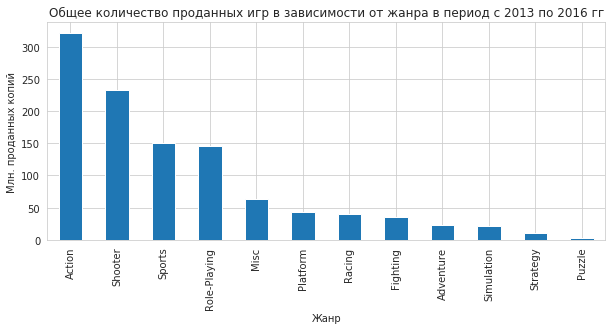

In [40]:
data_genre_actual = (
    data_games_actual.pivot_table(
        index='genre', 
        values='total_sales', 
        aggfunc='sum')
    .sort_values(by='total_sales',ascending=False)
    .plot(kind='bar', figsize=(10,4), grid=True, legend=False)
)
plt.title('Общее количество проданных игр в зависимости от жанра в период с 2013 по 2016 гг')
plt.xlabel('Жанр')
plt.ylabel('Млн. проданных копий');

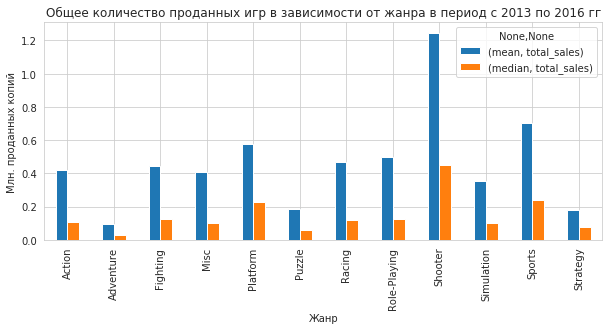

In [41]:
data_genre_actual = (
    data_games_actual.pivot_table(
        index='genre', 
        values='total_sales', 
        aggfunc=['mean', 'median'])
    .plot(kind='bar', figsize=(10,4), grid=True)
)
plt.title('Общее количество проданных игр в зависимости от жанра в период с 2013 по 2016 гг')
plt.xlabel('Жанр')
plt.ylabel('Млн. проданных копий');

Исходя из первого графика складывается впечатление, что наиболее популярным жанром является жанр Action (экшн), затем идет жанр Shooter ("стрелялка"), Sports ("спорт") и Role-Playing (ролевая игра).
<br> Наименее популярными жанрами являются Strategy (стратегии) и Puzzle (пазлы).
<br> Но для того, чтобы ответить на поставленный тобой вопрос, я перестроила график и получила немного иную картину.
<br> Популярность жанра Action обусловлена тем, что у этого жанра было большое количество платиновых игр (выбросов), это можно увидеть сравнив среднее и медианное значение, медианное значение значительно ниже среднего.
<br> Теперь мы получили, что наиболее популярным жанром стал жанр Shooter ("стрелялка"), затем Sports ("спорт"), потом Platform ("платформер"). Жанр Action (экшн) не вошел даже в топ-5
<br> Наименее популярными жанрами остались Puzzle (пазлы), Strategy (стратегии) и Adventure (приключения).

### Выводы по главе 4

Актуальный период принимаем с 2013 по 2016 гг. 
<br> Потенциально прибыльными платформами примем XOne, PS4 и 3DS.
<br> На среднее значение продаж влияет наличие платиновых  игр, при этом медиана намного ниже, поскольку большинство игр обладает гораздо более скромными продажам.
<br> Количество проданных дисков на всех платформах практически не зависит от оценок пользователей и имеет слабую зависимость от оценок критиков.
<br> Самым популярным жанром является жанр Shooter ("стрелялка"), Sports ("спорт") и Platform ("платформер").

## Составление портрета пользователя каждого региона

### Определение топ-5 популярных платформ

Для `Северной Америки`

In [42]:
data_na_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',values=['na_sales','total_sales'],aggfunc=('sum')
    )
)
data_na_sales_platform['part_na_sales'] = (
    data_na_sales_platform['na_sales'] / data_na_sales_platform['total_sales']
).round(3)
data_na_sales_platform = data_na_sales_platform.sort_values(by='na_sales',ascending=False)
data_na_sales_platform.reset_index(inplace=True)
data_na_sales_platform = data_na_sales_platform.loc[0:4, ['platform','na_sales', 'part_na_sales']]
print(data_na_sales_platform)

  platform  na_sales  part_na_sales
0      PS4    108.74          0.346
1     XOne     93.12          0.584
2     X360     81.66          0.597
3      PS3     63.50          0.350
4      3DS     38.20          0.267


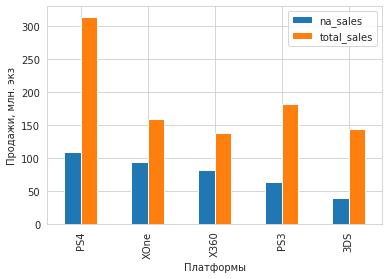

In [43]:
data_na_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',
        values=['na_sales','total_sales'],
        aggfunc=('sum'))
).sort_values(by='na_sales',ascending=False).head(5).plot(kind="bar")
plt.ytitle = "Продажи в Америке и в мире, млн. экз"
plt.xlabel("Платформы")
plt.ylabel("Продажи, млн. экз");

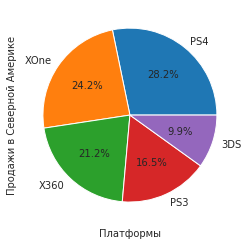

In [44]:
data_na_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',
        values=['na_sales'],
        aggfunc=('sum'))
).sort_values(
    by='na_sales',ascending=False
).head(5).plot(kind="pie", autopct='%1.1f%%', subplots=True, legend=False)

plt.xlabel("Платформы")
plt.ylabel("Продажи в Северной Америке");

В период с 2012 по 2016 года в Северной Америке в топ-5 популярных платформ входили:
<br> PS4, XOne, X360, PS3, 3DS

,platform,na_sales
0,3DS,38.20
1,PS3,63.50
2,X360,81.66
3,XOne,93.12
4,PS4,108.74
5,others,52.49


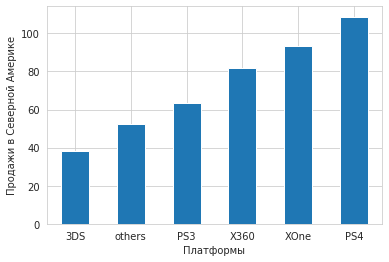

In [45]:
df_1 = data_games_actual.copy()
data_platform_na = df_1.groupby('platform')['na_sales'].sum().sort_values().to_frame()
data_platform_na2 =  data_platform_na['na_sales'].tail().copy().to_frame().reset_index()
df = {'platform':'others', 'na_sales': data_platform_na['na_sales'][::-1][5:].sum()}
data_platform_na2=data_platform_na2.append(df, ignore_index=True)
display(data_platform_na2)

data_platform_na2.set_index(
    'platform').sort_values(by='na_sales').plot(kind='bar', legend=False)
plt.ylabel('Продажи в Северной Америке')
plt.xlabel('Платформы')
plt.xticks(rotation=0)
plt.show()

Для `Европы`

In [46]:
data_eu_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',values=['eu_sales','total_sales'],aggfunc=('sum')
    )
)
data_eu_sales_platform['part_eu_sales'] = (
    data_eu_sales_platform['eu_sales'] / data_eu_sales_platform['total_sales']
).round(3)
data_eu_sales_platform = data_eu_sales_platform.sort_values(by='eu_sales',ascending=False)
data_eu_sales_platform.reset_index(inplace=True)
data_eu_sales_platform = data_eu_sales_platform.loc[0:4, ['platform','eu_sales', 'part_eu_sales']]
print(data_eu_sales_platform)

  platform  eu_sales  part_eu_sales
0      PS4    141.09          0.449
1      PS3     67.81          0.374
2     XOne     51.59          0.324
3     X360     42.52          0.311
4      3DS     30.96          0.216


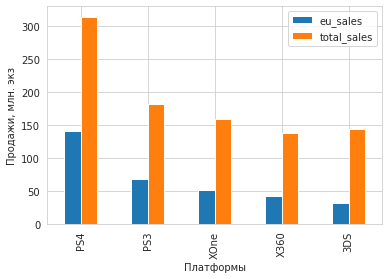

In [47]:
data_eu_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',
        values=['eu_sales','total_sales'],
        aggfunc=('sum'))
).sort_values(by='eu_sales',ascending=False).head(5).plot(kind="bar")
plt.ytitle = "Продажи в Европе и в мире, млн. экз"
plt.xlabel("Платформы")
plt.ylabel("Продажи, млн. экз");

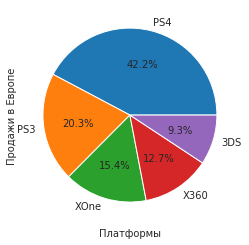

In [48]:
data_eu_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',
        values=['eu_sales'],
        aggfunc=('sum'))
).sort_values(by='eu_sales',ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', subplots=True, legend=False)
plt.xlabel("Платформы")
plt.ylabel("Продажи в Европе");

В период с 2012 по 2016 года в Европе в топ-5 популярных платформ входили те же платформы, что в и Северной Америке, но в других долях.

Для `Японии`

In [49]:
data_jp_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',values=['jp_sales','total_sales'],aggfunc=('sum')
    )
)
data_jp_sales_platform['part_jp_sales'] = (
    data_jp_sales_platform['jp_sales'] / data_jp_sales_platform['total_sales']
).round(3)
data_jp_sales_platform = data_jp_sales_platform.sort_values(by='jp_sales',ascending=False)
data_jp_sales_platform.reset_index(inplace=True)
data_jp_sales_platform = data_jp_sales_platform.loc[0:4, ['platform','jp_sales','part_jp_sales']]
print(data_jp_sales_platform)

  platform  jp_sales  part_jp_sales
0      3DS     67.81          0.473
1      PS3     23.35          0.129
2      PSV     18.59          0.564
3      PS4     15.96          0.051
4     WiiU     10.88          0.168


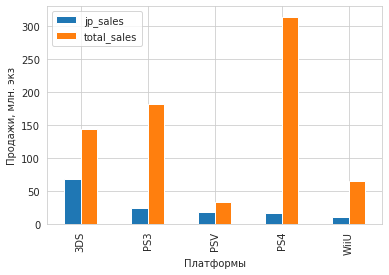

In [50]:
data_jp_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',
        values=['jp_sales','total_sales'],
        aggfunc=('sum'))
).sort_values(by='jp_sales',ascending=False).head(5).plot(kind="bar")
plt.ytitle = "Продажи в Японии и в мире, млн. экз"
plt.xlabel("Платформы")
plt.ylabel("Продажи, млн. экз");

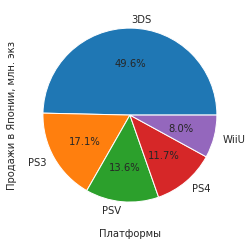

In [51]:
data_jp_sales_platform = (
    data_games_actual.pivot_table(
        index='platform',
        values=['jp_sales'],
        aggfunc=('sum'))
).sort_values(by='jp_sales',ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', subplots=True, legend = False)
plt.xlabel("Платформы")
plt.ylabel("Продажи в Японии, млн. экз");

В период с 2012 по 2016 года в Японии в топ-5 популярных платформ входили:
3DS, PS3, PSV, PS4, WiiU

**Вывод по подпункту 5.1**
<br> В период с 2012 по 2016 год в Северной Америке была наиболее популярна PS4 (28,2% от всех продаж), в Европе PS4 (42,2%), в Японии 3DS (49,6% - практически половина от всех продаж в Японии)
<br> Выбор японцев обусловлен их менталитетом (предпочтение национальных продуктов), удаленностью от Европы и Америки

### Определение топ-5 популярных жанров

Для `Северной Америки`

In [52]:
data_na_sales_genre = (
    data_games_actual.pivot_table(
        index='genre',values=['na_sales','total_sales'],aggfunc=('sum')
    )
)
data_na_sales_genre['part_na_sales'] = (
    data_na_sales_genre['na_sales'] / data_na_sales_genre['total_sales']
).round(3)
data_na_sales_genre = data_na_sales_genre.sort_values(by='na_sales',ascending=False)
data_na_sales_genre.reset_index(inplace=True)
data_na_sales_genre = data_na_sales_genre.loc[0:4, ['genre','na_sales','part_na_sales']]
print(data_na_sales_genre)

          genre  na_sales  part_na_sales
0        Action    126.05          0.392
1       Shooter    109.74          0.471
2        Sports     65.27          0.433
3  Role-Playing     46.40          0.318
4          Misc     27.49          0.438


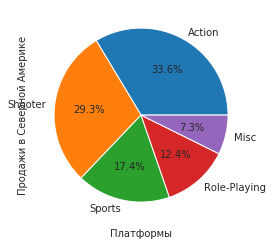

In [53]:
data_na_sales_platform = (
    data_games_actual.pivot_table(
        index='genre',
        values=['na_sales'],
        aggfunc=('sum'))
).sort_values(by='na_sales',ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', subplots=True, legend = False)
plt.xlabel("Платформы")
plt.ylabel("Продажи в Северной Америке");

В Северной Америке в топ-5 популярных жанров входили Action, Shooter, Sports, Pole-Playing, Misc

Для `Европы`

In [54]:
data_eu_sales_genre = (
    data_games_actual.pivot_table(
        index='genre',values=['eu_sales','total_sales'],aggfunc=('sum')
    )
)
data_eu_sales_genre['part_eu_sales'] = (
    data_eu_sales_genre['eu_sales'] / data_eu_sales_genre['total_sales']
).round(3)
data_eu_sales_genre = data_eu_sales_genre.sort_values(by='eu_sales',ascending=False)
data_eu_sales_genre.reset_index(inplace=True)
data_eu_sales_genre = data_eu_sales_genre.loc[0:4, ['genre','eu_sales','part_eu_sales']]
print(data_eu_sales_genre)

          genre  eu_sales  part_eu_sales
0        Action    118.13          0.367
1       Shooter     87.86          0.377
2        Sports     60.52          0.402
3  Role-Playing     36.97          0.253
4        Racing     20.19          0.506


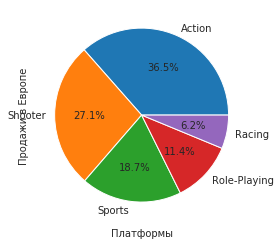

In [55]:
data_eu_sales_platform = (
    data_games_actual.pivot_table(
        index='genre',
        values=['eu_sales'],
        aggfunc=('sum'))
).sort_values(by='eu_sales',ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', subplots=True, legend = False)
plt.xlabel("Платформы")
plt.ylabel("Продажи в Европе");

В Европе в топ-5 популярных жанров в основном входили те жанры, что и в Северной Америке - 
Action, Shooter, Sports, Pole-Playing, за исключением пятого - Racing

Для `Японии `

In [56]:
data_jp_sales_genre = (
    data_games_actual.pivot_table(
        index='genre',values=['jp_sales','total_sales'],aggfunc=('sum')
    )
)
data_jp_sales_genre['part_jp_sales'] = (
    data_jp_sales_genre['jp_sales'] / data_jp_sales_genre['total_sales']
).round(3)
data_jp_sales_genre = data_jp_sales_genre.sort_values(by='jp_sales',ascending=False)
data_jp_sales_genre.reset_index(inplace=True)
data_jp_sales_genre = data_jp_sales_genre.loc[0:4, ['genre','jp_sales','part_jp_sales']]
print(data_jp_sales_genre)

          genre  jp_sales  part_jp_sales
0  Role-Playing     51.04          0.350
1        Action     40.49          0.126
2          Misc      9.20          0.146
3      Fighting      7.65          0.217
4       Shooter      6.61          0.028


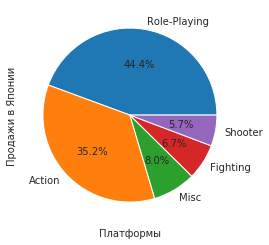

In [57]:
data_jp_sales_platform = (
    data_games_actual.pivot_table(
        index='genre',
        values=['jp_sales'],
        aggfunc=('sum'))
).sort_values(by='jp_sales',ascending=False).head(5).plot(
    kind="pie", autopct='%1.1f%%', subplots=True, legend = False)
plt.xlabel("Платформы")
plt.ylabel("Продажи в Японии");

Продажи в Японии опять координально отличаются от Северной Америке и Европе, в топ-5 популярных жанров в Японии  входят такие жанры, как Pole-Playing, Action, Misc, Fighting, Shooter, но при этом практически половину от всех продаж составляет жанр Pole-Playing (ролевые игры)

**Вывод по подпункту 5.2**
<br> В период с 2012 по 2016 год в Северной Америке был наиболее популярен жанр Action (33,6% от всех продаж), в Европе также Action (36,5%), а в Японии - Role-Playing (44,4%).
<br> Различия в популярности жанров в Америке с Европой и Японии обусловлены разницей менталитета. Японцы предпочитаю национальные продукты, а американцы и европейцы "всеядные".

### Определение влияния рейтинга ESRB на продажи в отдельных регионах

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Посмотрим все уникальные рейтинги в таблице с полными данными и только в актуальном периоде

In [58]:
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [59]:
data_games_actual['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

Произведем замену отсутствующего рейтинга на маркерное значение 0 (NULL)

In [60]:
data_games_actual['rating'] = data_games_actual['rating'].fillna(0)
data_games_actual['rating'].unique()

array(['M', 0, 'E', 'T', 'E10+'], dtype=object)

In [61]:
ESRB_na=data_games_actual.pivot_table(
    index='rating',values=['na_sales'],aggfunc=('sum')
).sort_values(by='na_sales',ascending=False)
print(ESRB_na)

        na_sales
rating          
M         165.21
0          89.42
E          79.05
E10+       54.24
T          49.79


In [62]:
ESRB_eu=data_games_actual.pivot_table(
    index='rating',values=['eu_sales'],aggfunc=('sum')
).sort_values(by='eu_sales',ascending=False)
print(ESRB_eu)

        eu_sales
rating          
M         145.32
E          83.36
0          78.91
E10+       42.69
T          41.95


In [63]:
ESRB_jp=data_games_actual.pivot_table(
    index='rating',values=['jp_sales'],aggfunc=('sum')
).sort_values(by='jp_sales',ascending=False)
print(ESRB_jp)

        jp_sales
rating          
0          85.05
T          20.59
E          15.14
M          14.11
E10+        5.89


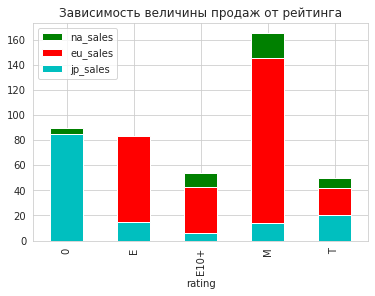

In [64]:
(ESRB_na
     .sort_values(by='na_sales',ascending=True)
     .groupby('rating')['na_sales'].median()
     .plot.bar(x='rating', y='na_sales', grid=True, color='g')
)

(ESRB_eu
     .sort_values(by='eu_sales',ascending=True)
     .groupby('rating')['eu_sales'].median()
     .plot.bar(x='rating', y='eu_sales', grid=True, color='r')
)

(ESRB_jp
     .sort_values(by='jp_sales',ascending=True)
     .groupby('rating')['jp_sales'].median()
     .plot.bar(x='rating', y='jp_sales', grid=True, color='c')
)
 
plt.title('Зависимость величины продаж от рейтинга')
plt.legend()
plt.show()

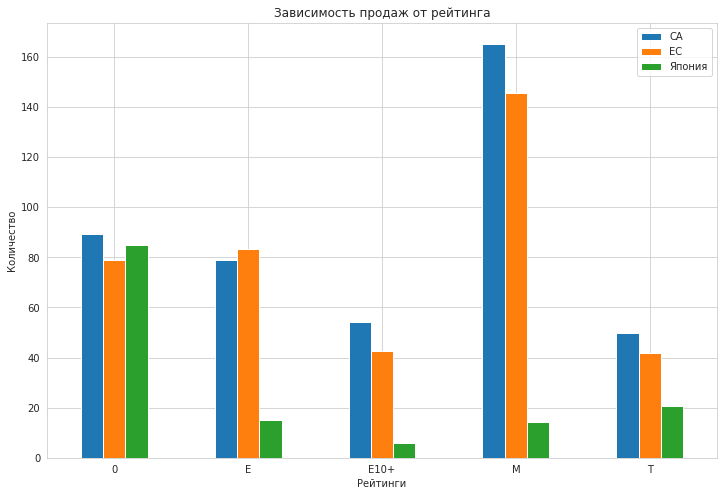

In [78]:
ax = data_games_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot.bar(figsize=(12,8))

ax.grid(True)
ax.legend(['СА', 'EC', 'Япония'])
ax.set(ylabel='Количество', xlabel='Рейтинги', title='Зависимость продаж от рейтинга')
plt.xticks(rotation=0);

**Вывод по подпункту 5.3**
<br> В Северной Америке и Европе максимально продаваемыми являются игры с рейтингом М (17+), хуже всего продаются игры с рейтингом Т (для подростков)
<br> В Японии картина немного иная. Лучше продаются игры, у которых не проставлен рейтинг, а хуже игры с Е10+ (для для детей с 10 лет)

### Выводы по главе 5

В 2017 году следует обратить внимание на консоли XOne, PS4 и 3DS, так как они популярны по всех странах.
Самым многообещающим является жанр Action, а возрастное ограниение М (17+) (для Европы и Америки) или без рейтинга (для Японии).

## Проверка поставленных гипотез

Для расчета возьмем очищенный от пропусков датасет в актуальном временной периоде, в который включим только данные о платформах, жанрах и рейтингах пользователей

In [66]:
data_hip = data_games_actual[["platform", "genre", "user_score"]].dropna(subset=['user_score'])
data_hip.isna().sum()

platform      0
genre         0
user_score    0
dtype: int64

### Первая гипотеза - о равенстве средних пользовательских рейтингов платформ Xbox One и PC

In [67]:
data_hip[data_hip.loc[:,'platform'] == 'XOne'].var()

user_score    1.906997
dtype: float64

In [68]:
data_hip[data_hip.loc[:,'platform'] == 'XOne'].count()

platform      182
genre         182
user_score    182
dtype: int64

In [69]:
data_hip[data_hip.loc[:,'platform'] == 'PC'].var()

user_score    3.035893
dtype: float64

In [70]:
data_hip[data_hip.loc[:,'platform'] == 'PC'].count()

platform      155
genre         155
user_score    155
dtype: int64

Так как выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, то применим значение equal_var = False

Н0: средние пользовательские рейтинги платформ Xbox One и PC равны между собой
<br> H1: средние пользовательские рейтинги платформ Xbox One и PC различаются
<br> Пороговое значение alpha примем равным 0,05

In [71]:
alpha = .05

results = stat.ttest_ind(
    data_hip.loc[data_hip.loc[:,'platform'] == 'XOne']['user_score'],
    data_hip.loc[data_hip.loc[:,'platform'] == 'PC']['user_score'],
    equal_var = False
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


Нет оснований отвергнуть нулевую гипотезу, следовательно, в 95% случаев средние пользовательские рейтинги платформ Xbox One и PC равны между собой

### Вторая гипотеза - о неравенстве средних пользовательских рейтингов жанров Action и Sports

In [72]:
data_hip[data_hip.loc[:,'genre'] == 'Action'].var()

user_score    1.769361
dtype: float64

In [73]:
data_hip[data_hip.loc[:,'genre'] == 'Action'].count()

platform      389
genre         389
user_score    389
dtype: int64

In [74]:
data_hip[data_hip.loc[:,'genre'] == 'Sports'].var()

user_score    3.180613
dtype: float64

In [75]:
data_hip[data_hip.loc[:,'genre'] == 'Sports'].count()

platform      160
genre         160
user_score    160
dtype: int64

Так как выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, то применим значение equal_var = False

Н0: средние пользовательские рейтинги жанров Action и Sports равны между собой
<br> H1: средние пользовательские рейтинги жанров Action и Sports различаются
<br> Пороговое значение alpha примем равным 0,05

In [76]:
alpha = .05

results = stat.ttest_ind(
    data_hip.loc[data_hip.loc[:,'genre'] == 'Action']['user_score'],
    data_hip.loc[data_hip.loc[:,'genre'] == 'Sports']['user_score'],
    equal_var = False
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704108e-20
Отвергаем нулевую гипотезу


Есть основания отвергнуть нулевую гипотезу, следовательно, в 95% случаев средние пользовательские рейтинги жанров Action и Sports разные

### Выводы по главе 5
В 95% случаев средние пользовательские рейтинги платформ Xbox One и PC равны между собой, а жанров Action и Sports - различаются
<br> В обоих случаях была рассмотрена двусторонная гипотеза, статистическая значимость 5%

##  Общий вывод

В 2017 году интернет-магазине «Стримчик» следует подходить к выпуску игр с учетом региона.
<br> Регионы Европа и Северная Америка формируют одинаковые запросы, а регион Японии стоит особняком.
<br> В Европу и Северную Америку наиболее рационально предлагать такие консоли как XOne, PS4. Жанровые предпочтения Европы и Северной Америки следующие Action и Shooter. Возрастная целевая аудитория - М (17+) и E10+ (от 10 лет и старше).
<br> В Японии лучше предлагать консоль 3DS. Жанровые предпочтения - Pole-Playing, Action. Возрастные ограничения - без рейтинга (это связано с тем, что американский рейтинг ESRB не популярен в Японии).